-----------
Initializing structure...
time for choose_chunkdivision = 0.00048399 s
Working in 2D dimensions.
Computational cell is 3.6 x 1.8 x 0 with resolution 200
time for set_epsilon = 0.299502 s
-----------


FloatProgress(value=0.0, description='0% done ', max=18.0)

Meep progress: 4.4425/18.0 = 24.7% done in 4.0s, 12.2s to go
on time step 1781 (time=4.4525), 0.00224745 s/step
Meep progress: 9.0775/18.0 = 50.4% done in 8.0s, 7.9s to go
on time step 3635 (time=9.0875), 0.0021595 s/step
Meep progress: 13.6425/18.0 = 75.8% done in 12.0s, 3.8s to go
on time step 5463 (time=13.6575), 0.00218929 s/step
run 0 finished at t = 18.0 (7200 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.000255108 s
Working in 2D dimensions.
Computational cell is 3.6 x 1.8 x 0 with resolution 200
     sphere, center = (0,0,0)
          radius 0.1
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.284518 s
lorentzian susceptibility: frequency=10.7433, gamma=1.78571
lorentzian susceptibility: frequency=3.47141, gamma=2.01155
lorentzian susceptibility: frequency=2.39466, gamma=0.701702
lorentzian susceptibility: frequency=0.66944, gamma=0.278261
lorentzian susceptibility: frequency=0.33472, gamma=0.19438
drude susc

FloatProgress(value=0.0, description='0% done ', max=28.0)

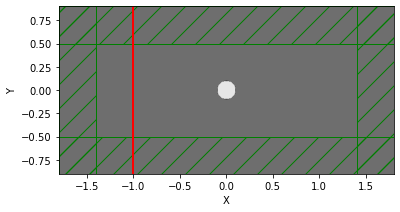

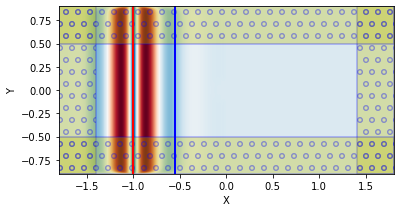

Meep progress: 1.5175/28.0 = 5.4% done in 4.0s, 69.9s to go
on time step 607 (time=1.5175), 0.0065918 s/step
Meep progress: 3.5125/28.0 = 12.5% done in 8.0s, 55.8s to go
on time step 1405 (time=3.5125), 0.00501501 s/step
Meep progress: 5.535/28.0 = 19.8% done in 12.0s, 48.8s to go
on time step 2214 (time=5.535), 0.00494815 s/step
Meep progress: 7.5525/28.0 = 27.0% done in 16.0s, 43.4s to go
on time step 3021 (time=7.5525), 0.0049582 s/step
Meep progress: 9.57/28.0 = 34.2% done in 20.0s, 38.5s to go
on time step 3829 (time=9.5725), 0.00495751 s/step
Meep progress: 11.52/28.0 = 41.1% done in 24.0s, 34.4s to go
on time step 4609 (time=11.5225), 0.00512833 s/step
Meep progress: 13.5425/28.0 = 48.4% done in 28.0s, 29.9s to go
on time step 5419 (time=13.5475), 0.00494488 s/step
Meep progress: 15.565/28.0 = 55.6% done in 32.0s, 25.6s to go
on time step 6228 (time=15.57), 0.00494622 s/step
Meep progress: 17.580000000000002/28.0 = 62.8% done in 36.0s, 21.4s to go
on time step 7035 (time=17.5875

In [5]:
import meep as mp
from meep.materials import Au
from meep.materials import Si
import numpy as np
import matplotlib.pyplot as plt

resolution = 200  # pixels/μm

radius = 0.1

wvl_min = 0.4
wvl_max = 0.8

dpml = 0.5*wvl_max
dair = 0.5*wvl_max
sy = 2*(dpml+dair+radius)
sx =  2 * sy 
cell_size = mp.Vector3(sx,sy,0)
pml_layers = [mp.PML(thickness=dpml)]

fmin = 1/wvl_max
fmax = 1/wvl_min
fcen = 0.5*(fmax+fmin)
df = fmax-fmin
nfreq = 100

sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df,is_integrated=True), component=mp.Ez, center=mp.Vector3(-radius-0.5*sy, 0),
                        size=mp.Vector3(y=sy))]

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=sources,
                    resolution=resolution)
                    #k_point=mp.Vector3())

dpad = 0.5*dair

refl_fr = mp.FluxRegion(center=mp.Vector3(-radius-0.25*sy, 0), direction=mp.X,size=mp.Vector3(y=sy))
refl = sim.add_flux(fcen, df, nfreq, refl_fr)

#box_x1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(x=-radius-dpad),size=mp.Vector3(0,2*(radius+dpad),2*(radius+dpad))))
#box_x2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(x=+radius+dpad),size=mp.Vector3(0,2*(radius+dpad),2*(radius+dpad))))
#box_y1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(y=-radius-dpad),size=mp.Vector3(2*(radius+dpad),0,2*(radius+dpad))))
#box_y2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(y=+radius+dpad),size=mp.Vector3(2*(radius+dpad),0,2*(radius+dpad))))
#box_z1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(z=-radius-dpad),size=mp.Vector3(2*(radius+dpad),2*(radius+dpad),0)))
#box_z2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(z=+radius+dpad),size=mp.Vector3(2*(radius+dpad),2*(radius+dpad),0)))

sim.run(until_after_sources=10)

empty_flux = mp.get_fluxes(refl)
empty_data = sim.get_flux_data(refl)
#freqs = np.asarray(mp.get_flux_freqs(refl))

#freqs = mp.get_flux_freqs(box_x1)
#box_x1_data = sim.get_flux_data(box_x1)
#box_x2_data = sim.get_flux_data(box_x2)
#box_y1_data = sim.get_flux_data(box_y1)
#box_y2_data = sim.get_flux_data(box_y2)
#box_z1_data = sim.get_flux_data(box_z1)
#box_z2_data = sim.get_flux_data(box_z2)

#box_x1_flux0 = mp.get_fluxes(box_x1)

sim.reset_meep()

len_si = 0.5*sx-radius

geometries = [mp.Sphere(radius=radius, center=mp.Vector3(), material=Au)]
             #,mp.Block(material=Si, size=mp.Vector3(len_si,mp.inf,mp.inf),
              #                center=mp.Vector3(x=radius+0.5*len_si))]

sim = mp.Simulation(cell_size=cell_size,
                    boundary_layers=pml_layers,
                    geometry=geometries,
                    sources=sources,
                    resolution=resolution)
                    #eps_averaging=False)
                    #k_point=mp.Vector3(),

plt.figure()
sim.plot2D()

#box_x1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(x=-radius-dpad),size=mp.Vector3(0,2*(radius+dpad),2*(radius+dpad))))
#box_x2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(x=+radius+dpad),size=mp.Vector3(0,2*(radius+dpad),2*(radius+dpad))))
#box_y1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(y=-radius-dpad),size=mp.Vector3(2*(radius+dpad),0,2*(radius+dpad))))
#box_y2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(y=+radius+dpad),size=mp.Vector3(2*(radius+dpad),0,2*(radius+dpad))))
#box_z1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(z=-radius-dpad),size=mp.Vector3(2*(radius+dpad),2*(radius+dpad),0)))
#box_z2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(center=mp.Vector3(z=+radius+dpad),size=mp.Vector3(2*(radius+dpad),2*(radius+dpad),0)))

#sim.load_minus_flux_data(box_x1, box_x1_data)
#sim.load_minus_flux_data(box_x2, box_x2_data)
#sim.load_minus_flux_data(box_y1, box_y1_data)
#sim.load_minus_flux_data(box_y2, box_y2_data)
#sim.load_minus_flux_data(box_z1, box_z1_data)
#sim.load_minus_flux_data(box_z2, box_z2_data)

refl = sim.add_flux(fcen, df, nfreq, refl_fr)
sim.load_minus_flux_data(refl, empty_data)

animate = mp.Animate2D(sim,
                       fields=mp.Ez,
                       realtime=True,
                       field_parameters={'alpha':0.8, 'cmap':'RdBu', 'interpolation':'none'},
                       boundary_parameters={'hatch':'o', 'linewidth':1.5, 'facecolor':'y', 'edgecolor':'b', 'alpha':0.3})

sim.run(mp.at_every(1,animate), until_after_sources=20)

refl_flux = mp.get_fluxes(refl)
R_meep = -1*np.divide(refl_flux,empty_flux)

freqs_ = mp.get_flux_freqs(refl)
wvls = np.divide(1,freqs_)

#box_x1_flux = mp.get_fluxes(box_x1)
#box_x2_flux = mp.get_fluxes(box_x2)
#box_y1_flux = mp.get_fluxes(box_y1)
#box_y2_flux = mp.get_fluxes(box_y2)
#box_z1_flux = mp.get_fluxes(box_z1)
#box_z2_flux = mp.get_fluxes(box_z2)

/tmp/ipykernel_187/4123580522.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.tight_layout()


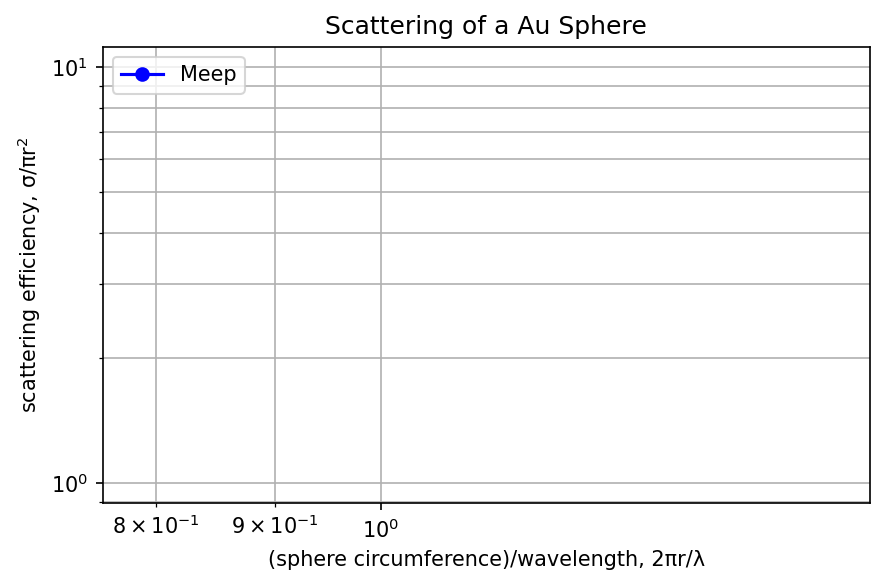

In [9]:
scatt_flux = np.asarray(refl_flux)
intensity = np.asarray(empty_flux)#/(2*radius)**2
scatt_cross_section = np.divide(scatt_flux,intensity)
scatt_eff_meep = scatt_cross_section#*-1/(np.pi*radius**2)

plt.figure(dpi=150)
plt.loglog(2*np.pi*radius*np.asarray(freqs_),scatt_eff_meep,'bo-',label='Meep')
plt.grid(True,which="both",ls="-")
plt.xlabel('(sphere circumference)/wavelength, 2πr/λ')
plt.ylabel('scattering efficiency, σ/πr$^{2}$')
plt.legend(loc='upper left')
plt.title('Scattering of a Au Sphere')
plt.tight_layout()

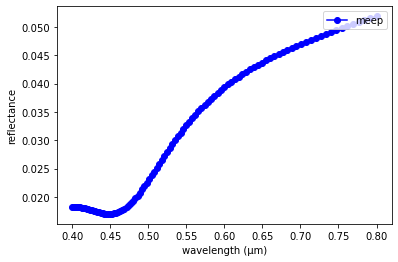

In [6]:
plt.figure()
plt.plot(wvls,R_meep,'bo-',label='meep')
plt.xlabel("wavelength (μm)")
plt.ylabel("reflectance")
plt.legend(loc='upper right')
plt.show()

In [7]:
animate.to_gif(fps=1E9, filename="Au_on_Si.gif")

Generating GIF...
